## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import re
from dateutil import parser

## Import Datasets

In [2]:
df = pd.read_csv('UberEatsReviews.csv')
df.head()

,review,date,stars,name,source,state,title
0,Edit: they brought the feature back! Used to b...,"January 18, 2024",Rated 5 stars out of five stars,Rufus Wright,Google Play Store,NaN,NaN
1,Lately it's very common to wait over 2 hours f...,"January 20, 2024",Rated 1 stars out of five stars,Bastian H,Google Play Store,NaN,NaN
2,Love it. Great offers. Good selections. Food a...,"January 20, 2024",Rated 5 stars out of five stars,Andrew Higgs,Google Play Store,NaN,NaN
3,Very disappointed in this app. I've used it fo...,"January 19, 2024",Rated 1 stars out of five stars,Kristi B,Google Play Store,NaN,NaN
4,Fairly easy to use but trying to find out what...,"January 20, 2024",Rated 2 stars out of five stars,broomee c,Google Play Store,NaN,NaN


## EDA and Data Cleaning

In [3]:
df.shape    

(11770, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11770 entries, 0 to 11769
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  11770 non-null  object
 1   date    11770 non-null  object
 2   stars   11770 non-null  object
 3   name    11755 non-null  object
 4   source  11770 non-null  object
 5   state   228 non-null    object
 6   title   335 non-null    object
dtypes: object(7)
memory usage: 643.8+ KB


In [5]:
df = df.drop(['state', 'title', 'name'], axis=1)

In [6]:
df.nunique()

review    11621
date       1430
stars        15
source        5
dtype: int64

### Cleaning Stars

In [7]:
df['stars'].unique()

array(['Rated 5 stars out of five stars',
       'Rated 1 stars out of five stars',
       'Rated 2 stars out of five stars',
       'Rated 4 stars out of five stars',
       'Rated 3 stars out of five stars', '1', '5', '4', '3', '2',
       'Rated 3 out of 5 stars', 'Rated 5 out of 5 stars',
       'Rated 2 out of 5 stars', 'Rated 1 out of 5 stars',
       'Rated 4 out of 5 stars'], dtype=object)

In [8]:
def clean_rating(rating):
    match = re.search(r'\d+', rating)
    if match:
        return match.group()
    return rating   

In [9]:
df['stars'] = df['stars'].apply(clean_rating)

In [36]:
df.head()

,review,date,stars,source,date_formatted,year,cleaned_text
0,Edit: they brought the feature back! Used to b...,"January 18, 2024",5,Google Play Store,2024-01-18,2024,"[edit, brought, feature, back, used, amazing, ..."
1,Lately it's very common to wait over 2 hours f...,"January 20, 2024",1,Google Play Store,2024-01-20,2024,"[lately, common, wait, hour, food, order, pass..."
2,Love it. Great offers. Good selections. Food a...,"January 20, 2024",5,Google Play Store,2024-01-20,2024,"[love, great, offer, good, selection, food, sh..."
3,Very disappointed in this app. I've used it fo...,"January 19, 2024",1,Google Play Store,2024-01-19,2024,"[disappointed, app, used, long, time, service,..."
4,Fairly easy to use but trying to find out what...,"January 20, 2024",2,Google Play Store,2024-01-20,2024,"[fairly, easy, use, trying, find, happening, o..."


### Cleaning Dates Values and EDA

In [11]:
df['date'].unique()

array(['January 18, 2024', 'January 20, 2024', 'January 19, 2024', ...,
       'Date of experience: July 28, 2023',
       'Date of experience: July 26, 2023',
       'Date of experience: July 27, 2023'], dtype=object)

In [12]:
def parse_and_format_date(date_str):
    try:
        # Remove any prefixes like "Date of experience:"
        date_str = date_str.replace("Date of experience: ", "")
        # Parse the date using dateutil.parser
        parsed_date = parser.parse(date_str)
        # Format the date as YYYY-MM-DD
        formatted_date = parsed_date.strftime('%Y-%m-%d')
        return formatted_date
    except Exception as e:
        print(f"Error parsing date: {date_str}, Error: {e}")
        return None


In [13]:
# Assuming your DataFrame is named 'df'
df['date_formatted'] = df['date'].apply(parse_and_format_date)

In [14]:
df['date_formatted'].unique()

array(['2024-01-18', '2024-01-20', '2024-01-19', '2024-01-17',
       '2024-01-12', '2024-01-09', '2024-01-14', '2024-01-15',
       '2024-01-11', '2024-01-13', '2023-12-26', '2024-01-02',
       '2024-01-21', '2023-12-28', '2023-12-09', '2023-11-17',
       '2023-12-12', '2023-11-30', '2023-12-18', '2023-12-07',
       '2023-11-29', '2023-11-20', '2023-12-10', '2023-11-07',
       '2023-11-09', '2023-12-13', '2023-11-18', '2023-11-26',
       '2023-11-28', '2024-01-08', '2023-11-19', '2023-12-16',
       '2023-12-08', '2024-01-01', '2023-12-27', '2023-11-21',
       '2024-01-06', '2023-11-22', '2024-01-03', '2023-11-16',
       '2024-01-16', '2023-12-11', '2024-01-07', '2023-11-27',
       '2023-12-23', '2023-12-14', '2023-11-24', '2023-12-03',
       '2023-12-31', '2023-12-22', '2023-12-24', '2023-12-02',
       '2024-01-05', '2023-12-21', '2023-11-14', '2023-11-04',
       '2023-11-11', '2024-01-04', '2023-11-23', '2023-12-01',
       '2023-11-05', '2023-12-30', '2023-12-17', '2023-

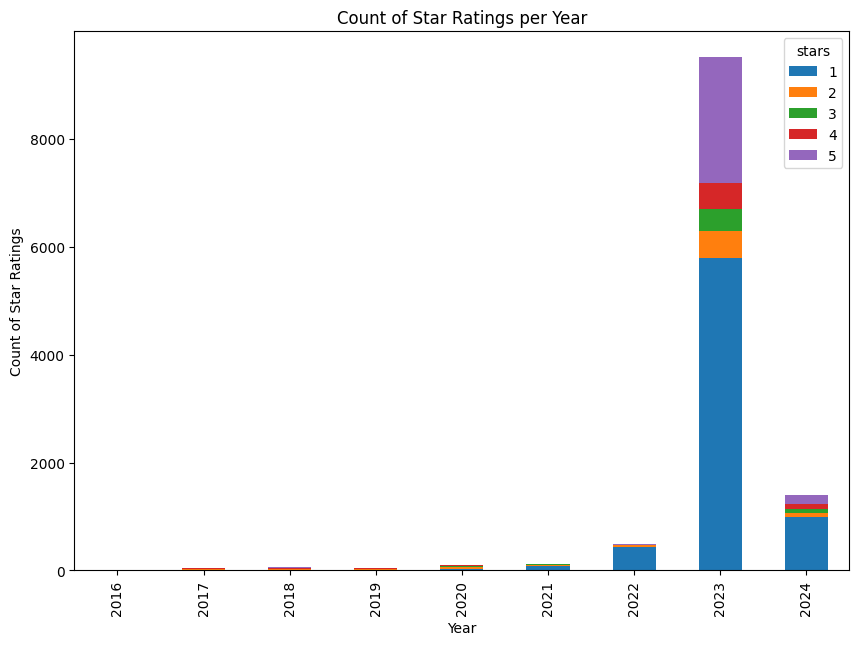

In [15]:
import matplotlib.pyplot as plt

# Ensure 'stars' is integer type
df['stars'] = df['stars'].astype(int)

# Extract year from 'date_formatted' if it's not already a column
df['year'] = pd.DatetimeIndex(df['date_formatted']).year

# Get count of each star rating for each year
star_counts = df.groupby(['year', 'stars']).size().unstack()

# Plot stacked bar chart
star_counts.plot(kind='bar', stacked=True, figsize=(10,7))

plt.title('Count of Star Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Count of Star Ratings')
plt.show()

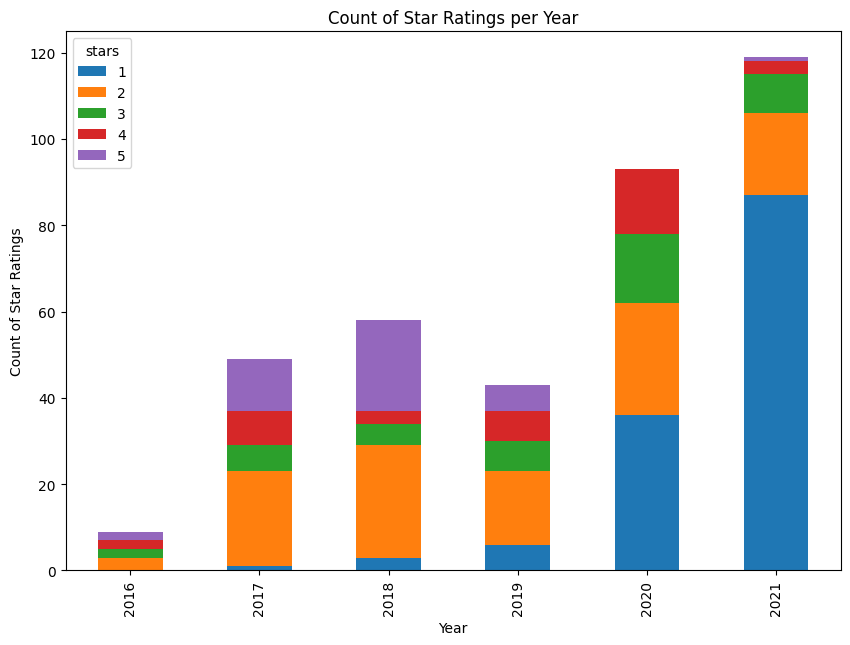

In [20]:
# Filter out 2023 and 2024
temp_df = df[~df['year'].isin([2022,2023, 2024])]

# Get count of each star rating for each year
star_counts = temp_df.groupby(['year', 'stars']).size().unstack()

# Plot stacked bar chart
star_counts.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Count of Star Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Count of Star Ratings')
plt.show()

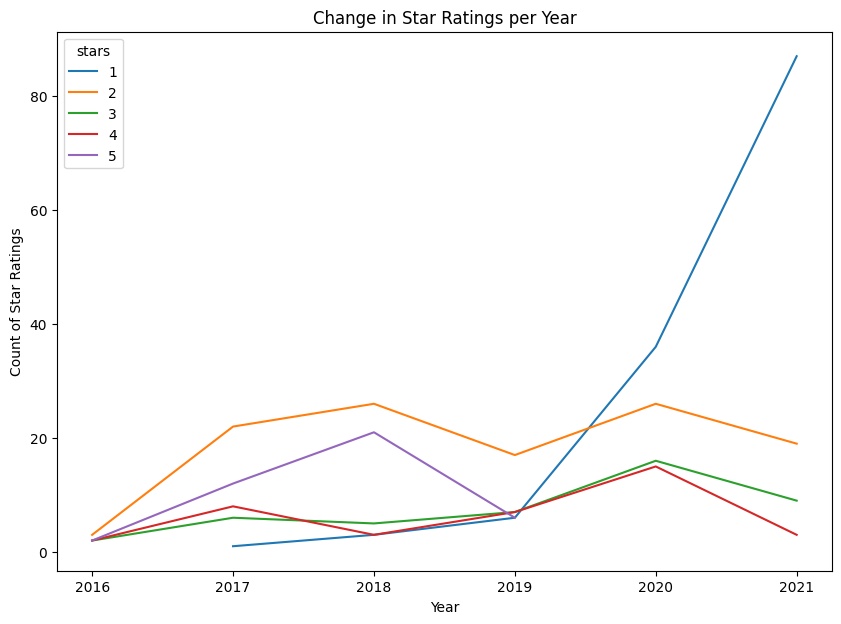

In [24]:
# Filter out 2022, 2023, and 2024
temp_df = df[~df['year'].isin([2022, 2023, 2024])]

# Get count of each star rating for each year
star_counts = temp_df.groupby(['year', 'stars']).size().unstack()

# Plot line graph
star_counts.plot(kind='line', figsize=(10,7))

plt.title('Change in Star Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Count of Star Ratings')
plt.show()

### Based on the Chart Above
The graph indicates a subtle rise in 1-star ratings for Uber Eats between 2014 and 2016. Establishing a direct connection to COVID-19 poses a challenge given the limited dataset. A comprehensive analysis incorporating data beyond 2016 becomes imperative to yield more definitive insights.

In the absence of additional data, confirming a causal relationship between COVID-19 and the surge in 1-star reviews on Uber Eats remains inconclusive. Nevertheless, it is plausible that the pandemic could have contributed to an uptick in negative reviews. Factors like prolonged wait times or suboptimal food temperatures during the pandemic might have increased customer dissatisfaction. Furthermore, the influx of new users during COVID-19 might have influenced lower ratings, particularly from those experiencing the service for the first time, potentially impacting overall rating trends.

### Cross-Index from Forbes
In response to COVID-19, Uber Eats witnessed a 10% sales surge amid widespread quarantines, according to a Forbes article by Marco Chiappetta on March 25, 2020. The increased demand resulted in a 30% rise in new customers and a surge in drivers seeking income supplementation. Major restaurants, including chains like Chipotle and Yum Brands, turned to Uber Eats to connect with customers as traditional ride-sharing declined. Although a positive amidst pandemic challenges, the article suggested that the heightened activity might not fully offset Uber's ride-share decline and could potentially increase losses for Uber Eats, given reported financial dynamics.

Source: [Forbes](https://www.forbes.com/sites/marcochiappetta/2020/03/25/uber-eats-demand-soars-due-to-covid-19-crisis/?sh=867ac11580ca)

## Data Pre-processing

In [32]:
import pandas as pd
from collections import Counter
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing Numbers
    tokens = [word for word in tokens if not word.isdigit()]

    # Removing Special Characters and Punctuation
    tokens = [word for word in tokens if word.isalpha()]

    # Removing Stop Words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # # Removing Emojis
    # tokens = [word for word in tokens if word not in emoji.UNICODE_EMOJI]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# Example usage:
df['cleaned_text'] = df['review'].apply(preprocess_text)

# Counting the most common words
word_counts = Counter()

for _, row in df.iterrows():
    word_counts.update(row['cleaned_text'])

print(word_counts.most_common(10))

[('order', 11512), ('uber', 7979), ('food', 7096), ('service', 6130), ('driver', 4981), ('delivery', 4814), ('time', 4722), ('app', 4352), ('eats', 4330), ('customer', 4091)]


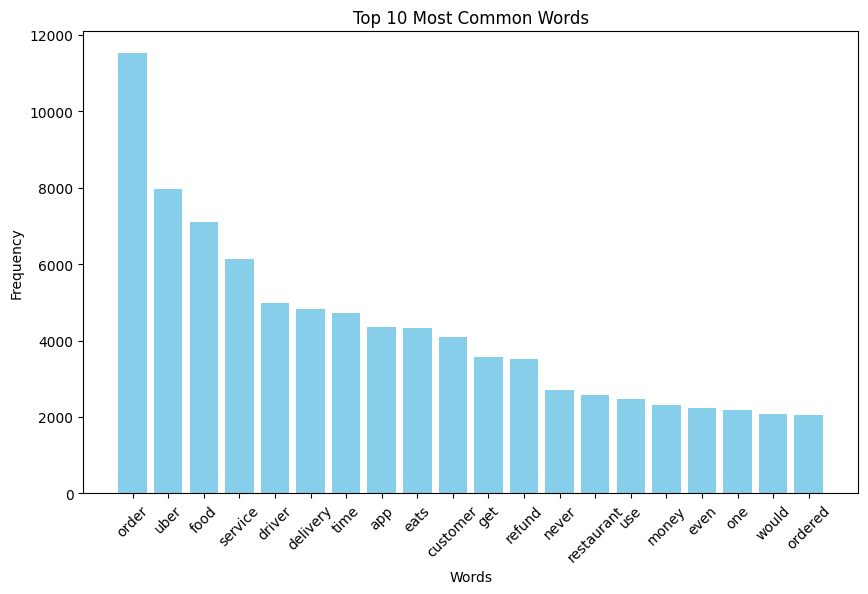

In [42]:
# Plotting the top 10 most common words
common_words = dict(word_counts.most_common(20))

plt.figure(figsize=(10, 6))
plt.bar(common_words.keys(), common_words.values(), color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [37]:
df.head()

,review,date,stars,source,date_formatted,year,cleaned_text
0,Edit: they brought the feature back! Used to b...,"January 18, 2024",5,Google Play Store,2024-01-18,2024,"[edit, brought, feature, back, used, amazing, ..."
1,Lately it's very common to wait over 2 hours f...,"January 20, 2024",1,Google Play Store,2024-01-20,2024,"[lately, common, wait, hour, food, order, pass..."
2,Love it. Great offers. Good selections. Food a...,"January 20, 2024",5,Google Play Store,2024-01-20,2024,"[love, great, offer, good, selection, food, sh..."
3,Very disappointed in this app. I've used it fo...,"January 19, 2024",1,Google Play Store,2024-01-19,2024,"[disappointed, app, used, long, time, service,..."
4,Fairly easy to use but trying to find out what...,"January 20, 2024",2,Google Play Store,2024-01-20,2024,"[fairly, easy, use, trying, find, happening, o..."
